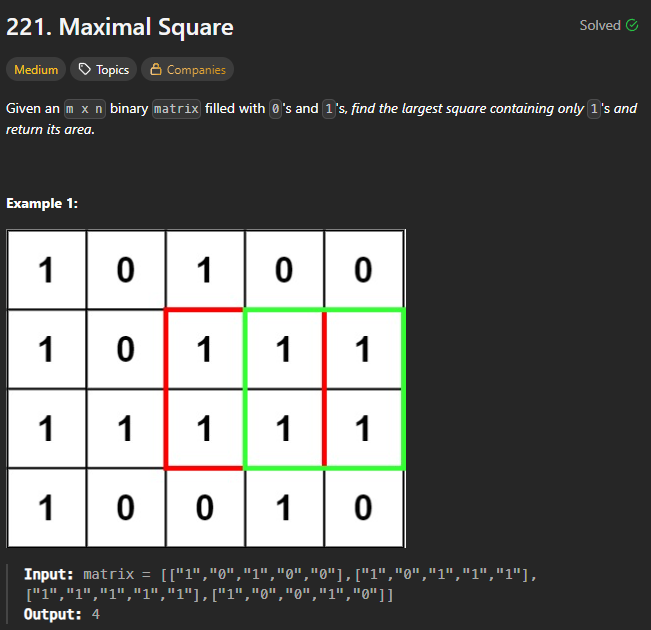

# Recursion

In [ ]:
class Solution:
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        if not matrix or not matrix[0]:
            return 0
        
        rows, cols = len(matrix), len(matrix[0])
        max_side = 0

        def dfs(i, j):
            if i >= rows or j >= cols:
                return 0

            if matrix[i][j] == "1":
                down = dfs(i + 1, j)
                right = dfs(i, j + 1)
                diag = dfs(i + 1, j + 1)
                return 1 + min(down, right, diag)
            else:
                return 0

        for i in range(rows):
            for j in range(cols):
                if matrix[i][j] == "1":
                    max_side = max(max_side, dfs(i, j))

        return max_side * max_side

# Memoization

In [ ]:
class Solution:
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        if not matrix or not matrix[0]:
            return 0
        
        rows, cols = len(matrix), len(matrix[0])
        max_side = 0
        memo = {}

        def dfs(i, j):
            if i >= rows or j >= cols:
                return 0

            if (i, j) in memo:
                return memo[(i, j)]

            if matrix[i][j] == "1":
                down = dfs(i + 1, j)
                right = dfs(i, j + 1)
                diag = dfs(i + 1, j + 1)
                memo[(i, j)] = 1 + min(down, right, diag)
                return memo[(i, j)]
            else:
                memo[(i, j)] = 0
                return 0

        for i in range(rows):
            for j in range(cols):
                if matrix[i][j] == "1":
                    max_side = max(max_side, dfs(i, j))

        return max_side * max_side

# 2D Dynamic Programming

In [ ]:
from typing import List

class Solution:
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        if not matrix or not matrix[0]:
            return 0

        rows, cols = len(matrix), len(matrix[0])
        dp = [[0] * cols for _ in range(rows)]
        max_side = 0

        for i in range(rows):
            for j in range(cols):
                if matrix[i][j] == "1":
                    if i == 0 or j == 0:
                        dp[i][j] = 1  # first row or column
                    else:
                        dp[i][j] = 1 + min(
                            dp[i-1][j],    # top
                            dp[i][j-1],    # left
                            dp[i-1][j-1]   # top-left
                        )
                    max_side = max(max_side, dp[i][j])
                # if it's "0", dp[i][j] stays 0 (default)

        return max_side * max_side